# Template of  jupyter notebook for analysis of WAXS

# Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

In [2]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py


## Define path

In [3]:
scat = 'SAXS'
det = '2M'

username = 'Dishari' 
cycle = '2020_Cycle3'
beamline = 'CMS'
 
#inDir = '/home/group/NSLSII_Data/CMS/2020_Cycle3/%s/saxs/raw/'%username
inDir ='/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/%s/Results/Dishari/Results/Stitched/saxs/'%(username )
print('The input dir is: %s'%inDir)

outDir0_ = '/home/group/NSLSII_Data/CMS/2020_Cycle3/%s/Results/'%username
outDir0_ = create_fullpath(  outDir0_ )
outDir0 = create_fullpath(  outDir0_ + username + '/' )
print('The output dir is: %s'%outDir0)

The input dir is: /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Dishari/Results/Dishari/Results/Stitched/saxs/
Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/  already exists
Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/  already exists
The output dir is: /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/


In [4]:
flag_save = True 

outDir1 = create_fullpath(  outDir0   + '%s/'%(scat)) 
outDir = create_dir(  'Results/', outDir1 )
create_dir( '%s/Results/TIFF/'%(scat), outDir0  )
outDir_HDF =  create_dir(  'HDF_Results/', outDir0 )
outDir_ResPipe = create_dir(  'ResPipes/', outDir1 )

print( outDir )
print( outDir_HDF)
print( outDir_ResPipe)

Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/  already exists
Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/Results/  already exists
Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/Results/TIFF/  already exists
Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/HDF_Results/  already exists
Directory  /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/ResPipes/  already exists
/home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/Results/
/home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/HDF_Results/
/home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/ResPipes/


# Find data

In [5]:
username_ = 'SD'

flists = ls_dir( inDir, and_list=[ username_ ])
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username))

There are 945 files for user: Dishari in this run.


In [6]:
9*3*5*7

945

## Find a sub-list

In [7]:
sam_dict, sams = get_Unique_SamDict_from_list( flists, cut_pattern= r'[_][p][o][s]', starting_point=0,     )   
ks =  sorted(list(sams.keys()))
N = len(ks)
print( 'There are %s samples.'%(N))

There are 27 samples.


In [8]:
sams

{'SD_Bare_Si_Wafer': 35,
 'SD_C2_IEC2_Unannealed_117': 35,
 'SD_C2_IEC2_Unannealed_20': 35,
 'SD_C2_IEC2_Unannealed_55': 35,
 'SD_C2_IEC3_Annealed_117': 35,
 'SD_C2_IEC3_Annealed_20': 35,
 'SD_C2_IEC3_Annealed_55': 35,
 'SD_C2_IEC3_Annealed_70': 35,
 'SD_C2_IEC4_Annealed_20': 35,
 'SD_C2_IEC4_Annealed_50': 35,
 'SD_C2_IEC4_Annealed_70': 35,
 'SD_C2_IEC4_Annealed_90': 35,
 'SD_C2_IEC4_Unannealed_20': 35,
 'SD_C2_IEC4_Unannealed_50': 35,
 'SD_C2_IEC4_Unannealed_90': 35,
 'SD_Nafion_Annealed_115': 35,
 'SD_Nafion_Annealed_17': 35,
 'SD_Nafion_Annealed_46': 35,
 'SD_Nafion_Annealed_70': 35,
 'SD_PSC2_IEC2_Annealed_20': 35,
 'SD_PSC2_IEC2_Annealed_52': 35,
 'SD_PSC_IEC2_Annealed_118': 35,
 'SD_PSC_IEC2_Annealed_70': 35,
 'SD_PSC_IEC3p6_Annealed_100': 35,
 'SD_PSC_IEC3p6_Annealed_20': 35,
 'SD_PSC_IEC3p6_Annealed_50': 35,
 'SD_PSC_IEC3p6_Annealed_70': 35}

# Test one data for sort

In [9]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/IO.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [10]:
i = 1
sam =  ks[i] 
print( sam )
flist  = sam_dict[ ks[i]]
sflistd = sort_fnlist( flist, pattern='', cut_beg = -24, cut_end=-19, method='cut_from_end' )
sflist = np.array( list(sflistd.values()) )
sflist 




SD_C2_IEC2_Unannealed_117


array(['SD_C2_IEC2_Unannealed_117_pos1_6011.8s_RH0.437_th0.050_10.00s_41023_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_6025.0s_RH0.458_th0.080_10.00s_41024_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_6039.0s_RH0.442_th0.100_10.00s_41025_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_6052.0s_RH0.479_th0.120_10.00s_41026_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_6065.0s_RH0.458_th0.150_10.00s_41027_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_6078.0s_RH0.484_th0.200_10.00s_41028_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_6091.0s_RH0.463_th0.250_10.00s_41029_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_12365.5s_RH25.233_th0.050_10.00s_41275_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_12379.5s_RH25.159_th0.080_10.00s_41276_stitched_saxs.tiff',
       'SD_C2_IEC2_Unannealed_117_pos1_12393.5s_RH25.111_th0.100_10.00s_41277_stitched_saxs.tiff',
       'SD_C2_IEC2_Unann

In [11]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

# A loop to sort

* here particularly for a humidity

In [12]:
humidity =np.array( [ 0, 25, 50, 75, 100  ] )
incs = np.array( [  0.05, 0.08, 0.10, 0.12, 0.15, 0.20, 0.25 ] )
qYoneda = 4*np.pi/0.918 * np.deg2rad( [ (0.132 + incs)/2 ]  )
print(qYoneda)

Nh = len( humidity)
Ni = len( incs )

[[0.02174132 0.02532506 0.02771421 0.03010337 0.0336871  0.03965999
  0.04563288]]


In [13]:
ssam_dict = {}    
for sam in ks:     
    #print( 'The sample is: %s.'%sam)
    flist = np.sort( sam_dict[ sam ] )
    sflistd = sort_fnlist( flist, pattern='', cut_beg = -24, cut_end=-19, method='cut_from_end' )
    sflist = np.array( list(sflistd.values()) )
    sd = {}
    for i in range(Nh):
        sd[ str(humidity[i]) ] = sflist[ i *7 :  (1+i)*7   ]   
    ssam_dict[sam] =sd

    

In [14]:
#sd

# Load mask

In [15]:
#mask =np.load( '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/' + 'mask_saxs_2020C3_SWong.npy')
 
mask1 =np.load( '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Dishari/Mask/' + 'mask_saxs_2020C3_SD_noygap_run1.npy')
mask2 =np.load( '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Dishari/Mask/' + 'mask_saxs_2020C3_SD_noygap.npy')

mask=mask1
show_img(mask)

<IPython.core.display.Javascript object>

## Define parameters

In [16]:
1679 - 490, 1679 - 604, 1679 - 552, 1210 - 1189 

(1189, 1075, 1127, 21)

In [17]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py

In [53]:
geometry   ='Reflection'
#geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/  13.5 )
sdd_mm =  5065.0  
b_xy = [754,  1189 ] # the first run
b_xy = [754,  1210 ] #the second and third run


bs_xy = [ 0, 50]   
incident_angle = 0
det_str = 'Pilatus2m' 
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, # 'Fang', 
                cycle =  cycle, # ='2020_Cycle2',
                beamline = beamline, #'SMI',
                outDir = outDir, )
              # mask = mask )

In [54]:
%matplotlib inline


In [20]:
#%matplotlib notebook

In [21]:
run_1st = ['SD_Bare_Si_Wafer',
 'SD_C2_IEC4_Annealed_20',
 'SD_C2_IEC4_Annealed_50',
 'SD_C2_IEC4_Annealed_70',
 'SD_C2_IEC4_Annealed_90',

 'SD_C2_IEC3_Annealed_117',
 'SD_C2_IEC3_Annealed_20',
 'SD_C2_IEC3_Annealed_55',
 'SD_C2_IEC3_Annealed_70',
 ]

# Do data reduction

In [22]:
T = True
F = False

In [23]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py

In [72]:
do_plot = T #True 
do_plot_raw = F # True
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_qimg = True
do_show_plot=F

###########################
#for GiSAXS
###########################
do_linecut_qz = T #False #True
#qz_cuts= [0.04, 0.08, 0.15 ]
#qz_wid = 0.0025
show_linecut_qz = F # T
mark_Yon = T


##################
#for SAXS
####################
do_qphi = False  #True
do_stitch = False
do_q_qphi = False #True
do_p_qphi = False #True

do_ciravg = F #False  #True  

do_ciravg_sector = F #False  #True
#for the angle range, the v-up is ~0, l-left, ~90;  v-down ~ 180/-180; h-right -90, 
ciravg_sector_angle_wid = 20 
ciravg_sector_angles = [  0, 90, 180, -90   ]
show_ciravg_sector = F



In [68]:
sample_list = ks[:1]
#sample_list = ks   #use a dummy papemill to run this

In [69]:
#plt.ioff()
#plt.ion()

The sample is: SD_Bare_Si_Wafer.
########################################
The incident angle is: 0.05.
The filename list for this sam=SD_Bare_Si_Wafer-inc=0.05 are:
 SD_Bare_Si_Wafer_pos1_3903.9s_RH0.463_th0.050_10.00s_37656_stitched_saxs.tiff.
########################################


/home/group/Software/pyScatt/pyScatt/generic_functions.py:456: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts
/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: saxs_linecut_qz_iqs_SD_Bare_Si_Wafer_pos1_3903.9s_RH0.463_th0.050_10.00s_37656_stitched_saxs.tiff_qz=0.0217.csv is saved in /home/group/NSLSII_Data/CMS/2020_Cycle3/Dishari/Results/Dishari/SAXS/Results/
Done


<Figure size 432x288 with 0 Axes>

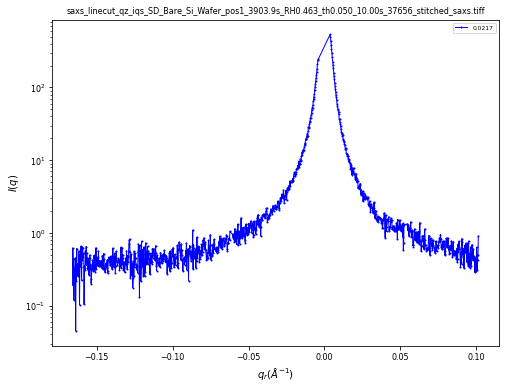

In [71]:
#loop all samples
#for sam in ks[ : 1]:     
for sam in sample_list:       
#for sam in ks[ : 1 ]:
#for sam in [ 'SD_Bare_Si_Wafer' ]: #'SD_C2_IEC3_Annealed_117']:  #, 'SD_C2_IEC2_Unannealed_117',] : 
           #'SD_PSC2_IEC2_Annealed_20']:     
    print( 'The sample is: %s.'%sam)
    hum_inc_dict = ssam_dict[sam]
    hum_inc_dict_ks = list( hum_inc_dict.keys() )
    if sam in run_1st:
        b_xy = [754,  1189 ] # the first run
        mask = mask1
    else:
        b_xy = [754,  1210 ] #the second and third run
        mask = mask2
    #mask = np.zeros_like( mask1 )  
    pargs_sc ['b_xy'] = b_xy    
    RES = {}   
    hi = 0 
    #loop all humidity
    for hum_key in  hum_inc_dict_ks[: ]:  
        hum =  humidity[hi] 
        RES['h=%s'%hum] = {}        
        inc_data_list = hum_inc_dict[ hum_key ]
        
        #loop all incident angles         
        for inc_data_fp in  inc_data_list[ :  ]: 
            SC=None
            p = re.search( 'th0\.', inc_data_fp  ).start()  +2
            inc =  inc_data_fp[p: p  + 4 ]  
            qYo = round(  4*np.pi/0.918 * np.deg2rad(   (0.132 + float(inc) )/2   ), 4 )
            full_filenames = [ inDir +  inc_data_fp   ] 
            print('#'*40)
            print('The incident angle is: %s.'%inc) 
            print('The filename list for this sam=%s-inc=%s are:\n %s.'%(sam, inc, inc_data_fp )) 
            print('#'*40)
            
            N = len( full_filenames )       
            ## Setup the class
            pargs_sc ['incident_angle'] = float( inc )
            SC =  Scattering( pargs_sc  )   
            SC.md['sample'] = sam
            SC.create_ai()
            SC.load_data( full_filenames )
            #mask = SC.ai.mask_data  
            #mask_inp = np.zeros_like(mask)  
            RES['h=%s'%hum]['inc=%s'%inc] = {} 
            #RES['h=%s'%hum]['inc=%s'%inc]['raw'] = { }
            saved_plots = {}  
            saved_data = {}
            #SC.md['sid'] =  []
            #######################################
            #plot the raw data
            ########################################
            i = 0 #in this dataset, there is only one file
            sami = SC.md['filenames'][i]  
            sid = sami[ -24: -19]             
            SC.md['sid'] = sid
 
            if do_plot_raw:
                title='raw_%s'%(sami)
                fig, ax= plt.subplots()
                SC.plot_img( img=SC.imgs[i] * ~mask, title=title, vmin= None, vmax= None, save=True, 
                             fig_ax=[fig,ax],mask= ~mask, fontsize=6 )
                if not do_show_plot:
                    plt.close(fig)                
                saved_plots['raw'] = title + '.png'
            if do_qimg:
                title = 'qimg_%s'%(sami)
                qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None, mask= mask, x='Qr', y='Qz', method = 'ai'  )
                #save to tiff?
                #save_array_to_tiff( qimg, SC.outDir + title 
                saved_plots['qimg'] = title + '.png'
                if do_plot:
                    fig, ax= plt.subplots()
                    SC.plot_qrz( img=qimg, x=qx, y=qz, fig_ax=[fig,ax], title=title, 
                                 fontsize=6, vmin=None, vmax=None  )
                    if mark_Yon:
                        ax.hlines( qYo, qx.min(),qx.max(), linewidth=1,color='r', linestyle = '--',    ) 
                    if not do_show_plot:
                        plt.close(fig)
                    plt.savefig( outDir + title + '.png' )                    
                qimg_mask = (qimg == 0)                    

            if do_linecut_qz:
                #Prange = [ [ qzi - qz_wid, qzi + qz_wid ] for qzi in qz_cuts  ]
                saved_data['lqz'] = []
                qz_cuts= [ qYo  ]
                qz_wid = 0.0025
                qiqs_lcqz = SC.qimg_linecut_qzs( qimg , qx_range=qx, qz_range=qz,
                                      qz_cuts=qz_cuts, qz_wid=qz_wid,  
                                       Qrange=[qx.min(), qx.max()], mask= ~qimg_mask  ) 
                
                title =  'saxs_linecut_qz_iqs_%s'%(sami)
                for kx in list( qiqs_lcqz.keys() ):                    
                    save_arrays(  data=qiqs_lcqz[kx], label= ['qr','qz=%s'%kx], dtype='array', 
                            filename=title+'_qz=%s.csv'%kx, path= SC.outDir, return_res = False,verbose=True) 
                    saved_data['lqz'].append( title+'_qz=%s.csv'%kx  )    
                saved_plots['lqz'] = title + '.png'                  
                if do_plot:    
                    fig, ax= plt.subplots()
                    SC.plot_stacked_multi_curves( xys = qiqs_lcqz, yshift = 1e2, save=True,fig_ax=[fig,ax],
                                          xlabel= r'$q_r(\AA^{-1})$', title =  title, fontsize=8 )
                    if not do_show_plot:
                        plt.close(fig)                    
                
                if do_plot:
                    if show_linecut_qz:                     
                        fig, ax = plt.subplots()
                        title='qimg_%s'%(sami)
                        SC.plot_qrz( img=qimg, x=qx, y=qz,title =  title , fontsize=6 , fig_ax = [fig,ax])
                        for qzc in qz_cuts:
                            plot1D( x= [ qx[0], qx[-1]] , y = [qzc, qzc], ls='-', ax =ax, 
                                   lw=1, m='',c ='r', legend='qz=%s'%qzc )
                        plt.savefig( SC.outDir + 'qimg_lincut_qz_%s'%(sami)) 
                        saved_plots['lqz'] = title + '.png'

            if do_ciravg:   
                Prange =  None
                Qrange =  None            
                q_ca,iq_ca, qmask = SC.qimg_circular_average(qimg, qx, qz,
                                            Qrange=Qrange,Prange=Prange,bins=1500,mask= ~qimg_mask)      
                if do_plot:
                    title =  'saxs_q_iq_%s'%(sami)
                    SC.plot_q_iq( q_ca,iq_ca, legend = 'ang_range-%s'%Prange,
                                 title =  title, figsize=[ 6,4  ], save=True , fontsize=6 ) 
                    saved_plots['qiq'] = title + '.png'

            if do_ciravg_sector:   
                Prange =   [ [w-ciravg_sector_angle_wid, w+ciravg_sector_angle_wid] for w in  ciravg_sector_angles  ]
                Qrange =  None            
                q_cas,iq_cas, qmask_cas = SC.qimg_circular_average_sector(qimg , qx, qz,
                                            Qrange=Qrange,Prange=Prange,bins=1500,mask= ~qimg_mask)   
                title =  'saxs_qs_iqs_%s'%(sami)
                SC.plot_multi_curves( xs = q_cas, ys = iq_cas, yshift = 1e2, #fig_ax = [fig,ax], 
                                      legends = Prange,title =  title,
                                      figsize=[ 6,4  ], save=True , fontsize=6 )    
                saved_plots['qiq_sec'] = title + '.png'
                if show_ciravg_sector:
                    N = len(Prange)
                    fig,axes=create_fig_ax( H=1,V=N, figsize=[8,4],  y=1.08, title='ciravg_sector_cuts' )
                    for i, ki in enumerate(list(qmask_cas.keys())):
                        show_img( qmask_cas[ ki ], ax=[fig, axes[i]])
            if do_qphi:  
                qphi_bins = [ 500, 180 ]
                Prange =  None
                Qrange =  None            
                q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(qimg, qx, qz,
                                                        Qrange=Qrange,Prange=Prange,                                                      
                                                          bins=qphi_bins,mask=qmask) 
                if do_q_qphi:
                    q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
                if do_p_qphi:  
                    p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, )            
                if do_plot:
                    title = 'qphi_%s'%sami
                    SC.plot_qphi( qphi_QP, q_QP, phi_QP, vmin= None,
                                  vmax=None, aspect= 0.0005,
                                  title= title , save=True, fontsize=6 ) 
                    saved_plots['qphi'] = title + '.png'
            res = SC.res_to_dict( do_ciravg =do_ciravg, do_qphi = do_qphi, do_qimg=do_qimg,
                                 do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,
                                 do_linecut_qz = do_linecut_qz,  
                                 do_ciravg_sector = do_ciravg_sector )
            res['md'] = {} 
            res['md'].update( SC.md   )
            RES['h=%s'%hum]['inc=%s'%inc]  = res  
            RES['h=%s'%hum]['inc=%s'%inc]['saved_plots'] = saved_plots 
            RES['h=%s'%hum]['inc=%s'%inc]['saved_data'] = saved_data             
            #print(  'h=%s'%hum,  'inc=%s'%inc )
            #print('the meta data should be:')
            #print(  RES['h=%s'%hum]['inc=%s'%inc]['md'] )
            #print( SC.md)
            #RES['h=%s'%hum]['inc=%s'%inc]['mask'] = mask
        hi += 1
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                             h5path='/GiSAXS/', mode='a', overwrite_data=True)

    print('Done')    
        
        
        

# The END!

In [ ]:
if F:
    fig, ax = plt.subplots()
    qimgc = qimg.copy()
    rc = 630
    ring_mask = create_ring_mask( qimg.shape, r1=rc-10, r2=rc+10, center = [450, 186 ]  )
    qimgc[ring_mask] *=1e3


    SC.plot_img( img=qimgc, title='qimg_%s'%(sami), fontsize=6 , fig_ax = [fig,ax])
    #SC.plot_qrz( img=qimg, x=qx, y=qz, title='qimg_%s'%(sami), fontsize=6 , fig_ax = [fig,ax])

